In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Classification

In [3]:
fmnist_data = keras.datasets.fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

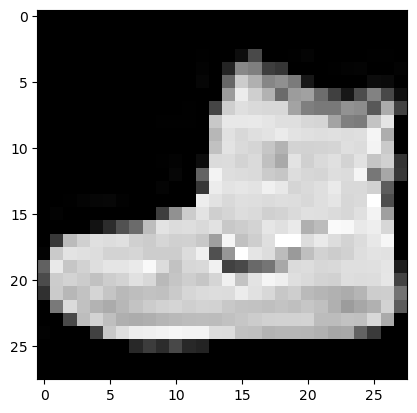

In [9]:
plt.imshow(x_train[0,], cmap="gray")

In [10]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model

In [11]:
init_1 = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg', distribution='uniform')

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    # keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal" ),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

/home/saeed/repositories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/saeed/repositories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
W0000 00:00:1742925732.707838    5350 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [13]:
model.layers

[<Flatten name=flatten, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Dense name=dense, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Activation name=activation, built=True>,
 <Dense name=dense_1, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <LeakyReLU name=leaky_re_lu, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
weights = model.layers[1].get_weights()

In [15]:
weights

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

# Compile Model

In [16]:
sgd = keras.optimizers.SGD(clipvalue=1.0)

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

# Fit Model

In [20]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_split=0.15,
                    )

Epoch 1/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7057 - loss: 0.8810 - val_accuracy: 0.8291 - val_loss: 0.4880
Epoch 2/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8242 - loss: 0.5036 - val_accuracy: 0.8442 - val_loss: 0.4415
Epoch 3/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8374 - loss: 0.4593 - val_accuracy: 0.8522 - val_loss: 0.4169
Epoch 4/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8502 - loss: 0.4280 - val_accuracy: 0.8578 - val_loss: 0.4034
Epoch 5/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8557 - loss: 0.4067 - val_accuracy: 0.8570 - val_loss: 0.3917


In [21]:
history.history

{'accuracy': [0.7746274471282959,
  0.8282352685928345,
  0.8422156572341919,
  0.8513725399971008,
  0.8556274771690369],
 'loss': [0.6668222546577454,
  0.4898153841495514,
  0.4492102861404419,
  0.4265906810760498,
  0.4048358201980591],
 'val_accuracy': [0.8291110992431641,
  0.8442222476005554,
  0.852222204208374,
  0.8577777743339539,
  0.8569999933242798],
 'val_loss': [0.4879693388938904,
  0.44147059321403503,
  0.416911780834198,
  0.4034319818019867,
  0.3917486369609833]}

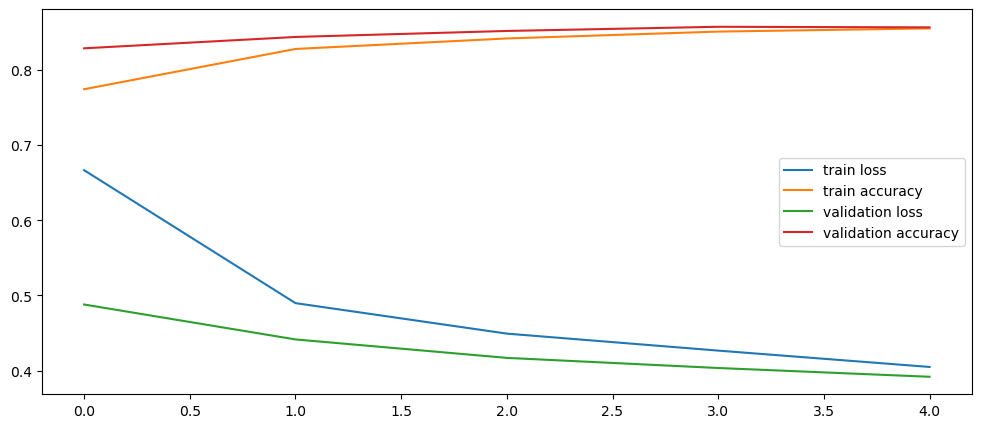

In [22]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         7,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 75)             │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,498 (353.51 KB)

 Trainable params: 88,578 (346.01 KB)

 Non-trainable params: 1,918 (7.49 KB)

 Optimizer params: 2 (12.00 B)

# Save Model

In [27]:
model.save("model0.keras")
model0 = keras.models.load_model("model0.keras")

In [28]:
model0.layers

[<Flatten name=flatten, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Dense name=dense, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Activation name=activation, built=True>,
 <Dense name=dense_1, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <LeakyReLU name=leaky_re_lu, built=True>,
 <Dense name=dense_2, built=True>]

In [29]:
model0.layers[4].trainable

True

In [32]:
model1 = keras.models.Sequential([model0.layers[-1]])

In [35]:
model1.add(keras.layers.Dense(1, activation="sigmoid"))

In [36]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 760 (2.97 KB)

 Trainable params: 760 (2.97 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
for layer in model1.layers:
    print(layer.trainable)

True
True
True
